### Libraries import and image processing 

In this notebook we will work with **Hough space** and convert image form x,y coordinates to Hough polar coorginates.

*Theory*: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

We will use a photo of a man, holding a phone. <br>
Let's say we want to **isolate screen area** by using Hough transform. <br>
We should be able to detect the lines that form screen boundaries.

Thus, our main goal: **perform edge detection**.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline

Text(0.5, 1.0, 'Phone image')

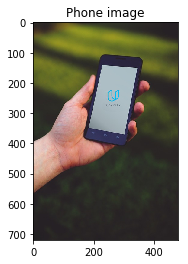

In [2]:
image = cv2.imread('example images/phone.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)
plt.title('Phone image')

### Perform edge detection

As usually, start with **converting image into grayscale**.

In [3]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

Next, let's define thresholds for image and perform **Canny edge detector** first. 

Text(0.5, 1.0, 'Canny edge detector')

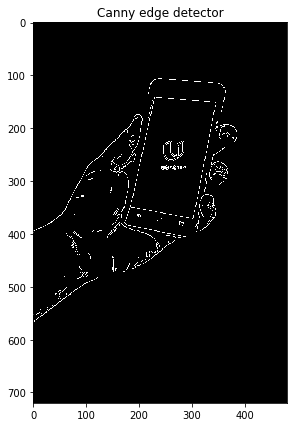

In [4]:
low_threshold = 50
high_threshold = 100

edges = cv2.Canny(gray, low_threshold, high_threshold)

f = plt.figure(figsize = (18,7))
plt.imshow(edges, cmap = 'gray')
plt.title('Canny edge detector')

Abnove we see, that image is consisted of small **discontinious edges (fragmented lines)**. 

### Find lines using Hough transformation 

Next, we can perform Hough transformation to piece these **fragmented lines together and form continious lines**.

We are able to use `cv2.HoughLinesP()` to perform Hough transformation. It has **multiple parameters**: 
- **rho** and **theta**: relates to **resolution of detection**. We will set this as one pixel and one degree respectfully;
- **threshold**: **minimum Hough space intersections** (intersection of sinusoids) needed to detect a line; 
- **line length**;
- **gap** between discontinious line segments.

`cv2.HoughLinesP()`  function will return all detected Hough lines:
- each line is an **array of 4 points - (x1, y1), (x2, y2)** that form our line. 

In [18]:
# list and set up parameters
rho = 1
theta = np.pi/180
threshold = 60 
min_line_length = 50
max_line_gap = 5

# note, we will pass additional empty array np.array([])
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), 
                        min_line_length, max_line_gap)

Next lets copy our image and **iterate over the lines**.<br>
For **each line in Hough lines** we use `cv2.line` function with params to plot the line:
- image we will use for detection;
- line points (x1,y1), (x2,y2);
- color,
- size.

Text(0.5, 1.0, 'Plotted lines')

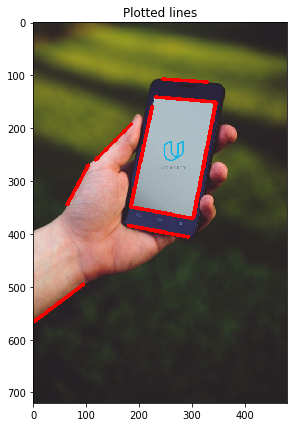

In [9]:
# iterate over output and draw lines on image 
image_lines = np.copy(image_copy)

for line in lines:
    for x1,y1, x2, y2 in line:
        cv2.line(image_copy, (x1,y1), (x2,y2), (255, 0, 0), 5)
f = plt.figure(figsize = (18,7))
plt.imshow(image_lines)
plt.title('Plotted lines')

Here we see the result - created **lines around screen**, identifying edges and lines along the hand. <br>
Of course, we can filter out some of these lines by **increasing the minimum line length**.

Text(0.5, 1.0, 'Plotted lines (threshold = 100)')

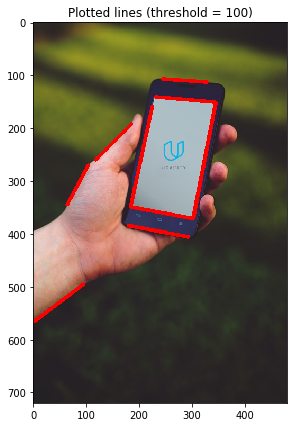

In [10]:
# list and set up parameters
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap = 5

# note, we will pass additional empty array np.array([])
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), 
                        min_line_length, max_line_gap)

# iterate over output and draw lines on image 
image_lines = np.copy(image_copy)

for line in lines:
    for x1,y1, x2, y2 in line:
        cv2.line(image_copy, (x1,y1), (x2,y2), (255, 0, 0), 5)
f = plt.figure(figsize = (18,7))
plt.imshow(image_lines)
plt.title('Plotted lines (threshold = 100)')

This procedure can be very helpful in noticing details and forming boundaries of an object. <br>
Often we will need to decide between using contours or Hough space to find object boundaries. 